### This file is strictly for exploring features containing lists/array of values. These features are as follows:
- features
- highlightedFeatures
- highlights
- packages
- priorUseDescriptions

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import glob
import missingno as msno

import warnings
warnings.filterwarnings('ignore') 

### Read in the Dataset

In [2]:
# Point to data files location
path = "./scraper/data/6_23_2025/"
all_files = glob.glob(path + "*.json")

# Read all files into single dataframe
df_list = []
for file in all_files:
    df = pd.read_json(file)
    df_list.append(df)

# ignore_index resets index of combined DF to prevent index duplicates
raw_df = pd.concat(df_list, ignore_index=True) 

# Display entire data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Examine and excerpt of data
raw_df.head(5)

,stockNumber,vin,year,make,model,body,trim,basePrice,originalPrice,hasPriceDrop,mileage,storeId,storeName,storeCity,state,stateAbbreviation,distance,averageRating,numberOfReviews,repairPalData,isNewArrival,isTransferable,features,highlightedFeatures,highlights,lastMadeSaleableDate,transferFee,transferTags,transferText,transferType,minEstimatedTransferDurationInDays,maxEstimatedTransferDurationInDays,transferTimesUnavailable,exteriorColor,interiorColor,normalizedExteriorColor,normalizedInteriorColor,transmission,review,numberOfFavorites,isSaleable,isComingSoon,isReserved,mpgCity,mpgHighway,originalBatteryRangeInMiles,cylinders,driveTrain,engineType,fuelType,horsepower,horsepowerRpm,engineSize,engineTorque,engineTorqueRpm,priorUseDescriptions,isAvailableToTransact,recommendationType,bestFinanceDecision,store,featureScore,vehicleSize,packages,types,series,isSavedCar,heroImageUrl,heroThumbnailImageUrl,isEVTaxCreditEligible
0,27461478,5NPEG4JA8NH134099,2022,Hyundai,Sonata,4D Sedan,SE,19998,NaN,False,56782,7298,Roswell,Roswell,Georgia,GA,2108.0,4.200000,5,NaN,False,True,"[Rear Defroster, Overhead Airbags, Auxiliary A...","Rear View Camera,Auxiliary Audio Input,Alloy W...","[singleOwner, warranty, fuelEfficient, advance...",2025-06-12T20:56:13.565Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Gray,Gray,NaN,NaN,Automatic,NaN,0,True,False,False,28.0,38.0,NaN,4,Front Wheel Drive,Gas,NaN,191.0,6100.0,2.5L,181.0,4000.0,"[{'id': 20, 'name': 'Leased Vehicle', 'descrip...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",3.0,NaN,[],NaN,None,False,https://img2.carmax.com/assets/27461478/hero.j...,NaN,False
1,26070459,JTDEPMAE5NJ210260,2022,Toyota,Corolla,4D Sedan,LE,20998,NaN,False,33730,7298,Roswell,Roswell,Georgia,GA,2108.0,4.500000,22,NaN,False,True,"[Power Windows, Power Locks, Air Conditioning,...","Rear View Camera,Auxiliary Audio Input,Overhea...","[warranty, fuelEfficient, advancedFeatures]",2025-06-12T20:53:33.311Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Blue,Black,NaN,NaN,Automatic,NaN,0,True,False,False,30.0,38.0,NaN,4,Front Wheel Drive,Gas,NaN,139.0,6100.0,1.8L,126.0,3900.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,NaN,[],NaN,None,False,https://img2.carmax.com/assets/26070459/hero.j...,NaN,False
2,27175122,3GCUDFE80RG128481,2024,Chevrolet,Silverado 1500,4D Crew Cab,LT Trail Boss,51998,NaN,False,58240,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,1,NaN,False,True,"[Power Locks, Auxiliary Audio Input, AM/FM Ste...","Z71 Package,4WD/AWD,Leather Seats,BOSE Sound S...","[singleOwner, advancedFeatures, premiumAudio]",2025-06-20T21:39:32.178Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Black,Black,NaN,NaN,Automatic,NaN,0,True,False,False,23.0,27.0,NaN,6,Four Wheel Drive,Diesel,NaN,305.0,3750.0,3.0L,495.0,2750.0,[],True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",10.0,NaN,"[Convenience Package, Z71 Package]",NaN,None,False,https://img2.carmax.com/assets/27175122/hero.j...,NaN,False
3,27072297,1V2WE2CA5PC229115,2023,Volkswagen,Atlas Cross Sport,4D Sport Utility,SE w/Tech,32998,NaN,False,15895,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,2,NaN,False,True,"[Alloy Wheels, 20 Inch Plus Wheels, Power Lock...","Technology Package,Leatherette Seats,Satellite...","[singleOwner, lowMiles, warranty, advancedFeat...",2025-05-28T20:50:22.353Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Black,Black,NaN,NaN,Automatic,NaN,0,True,False,False,18.0,24.0,NaN,6,Front Wheel Drive,Gas,NaN,276.0,6200.0,3.6L,266.0,3600.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",5.0,NaN,[Technology Package],NaN,None,False,https://img2.carmax.com/assets/27072297/hero.j...,NaN,False
4,27386026,58AGZ1B12MU110647,2021,Lexus,ES 350,4D Sedan,F-Sport,35998,NaN,False,2690

In [3]:
# Make a copy of the original dataframe
df = raw_df.copy()

# Drop duplicate values by VIN
df = df.drop_duplicates(subset=['vin'], keep='first')

### Examine the features, highlightedFeatures, highlights, and packages

In [4]:
# Add all vehicle option related columns into a single dataframe
vehicle_options = [
    'year', 'make', 'model', 'body', 'features', 
    'highlightedFeatures', 'highlights', 'packages',
    'priorUseDescriptions'
]
vehicle_options_df = df[vehicle_options]

# Set options to display full content of arrays/lists
pd.set_option('display.max_colwidth', None)  # Display full column width

vehicle_options_df.head(10)

,year,make,model,body,features,highlightedFeatures,highlights,packages,priorUseDescriptions
0,2022,Hyundai,Sonata,4D Sedan,"[Rear Defroster, Overhead Airbags, Auxiliary Audio Input, Android Auto, Alloy Wheels, Power Mirrors, Bluetooth Technology, Automated Cruise Control, Rear View Camera, AM/FM Stereo, Air Conditioning, Traction Control, Cloth Seats, Side Airbags, Power Locks, Lane Departure Warning, Apple CarPlay, ABS Brakes, Power Windows]","Rear View Camera,Auxiliary Audio Input,Alloy Wheels,Overhead Airbags,Traction Control,Side Airbags","[singleOwner, warranty, fuelEfficient, advancedFeatures]",[],"[{'id': 20, 'name': 'Leased Vehicle', 'description': 'This vehicle was previously leased by a consumer for personal use.'}]"
1,2022,Toyota,Corolla,4D Sedan,"[Power Windows, Power Locks, Air Conditioning, Auxiliary Audio Input, Overhead Airbags, Power Mirrors, Rear View Camera, ABS Brakes, Bluetooth Technology, Android Auto, Lane Departure Warning, Automated Cruise Control, Apple CarPlay, Cloth Seats, Satellite Radio Ready, Traction Control, AM/FM Stereo, Side Airbags, Rear Defroster, SiriusXM Trial Available]","Rear View Camera,Auxiliary Audio Input,Overhead Airbags,Traction Control,Side Airbags,Air Conditioning","[warranty, fuelEfficient, advancedFeatures]",[],"[{'id': 10, 'name': 'Fleet', 'description': 'This vehicle was previously part of a fleet of vehicles used by a business.'}, {'id': 20, 'name': 'Leased Vehicle', 'description': 'This vehicle was previously leased by a consumer for personal use.'}, {'id': 40, 'name': 'Loaner', 'description': 'This vehicle was provided to a CarMax customer to use while his/her car was in for service.'}]"
2,2024,Chevrolet,Silverado 1500,4D Crew Cab,"[Power Locks, Auxiliary Audio Input, AM/FM Stereo, ABS Brakes, Power Seat(s), Cruise Control, Leather Seats, 20 Inch Plus Wheels, Bed Liner, Tow Hitch, Overhead Airbags, Heated Steering Wheel, Alloy Wheels, Parking Sensors, Side Airbags, Rear View Camera, Navigation System, Lane Departure Warning, Traction Control, Running Boards, Air Conditioning, Power Mirrors, Power Windows, Apple CarPlay, Android Auto, Bluetooth Technology, Remote Start, Satellite Radio Ready, Rear Defroster, Smart Key, Front Seat Heaters, SiriusXM Trial Available, Premium Sound]","Z71 Package,4WD/AWD,Leather Seats,BOSE Sound System,Satellite Radio Ready,Parking Sensors","[singleOwner, advancedFeatures, premiumAudio]","[Convenience Package, Z71 Package]",[]
3,2023,Volkswagen,Atlas Cross Sport,4D Sport Utility,"[Alloy Wheels, 20 Inch Plus Wheels, Power Locks, Power Seat(s), Android Auto, Power Windows, Smart Key, Bluetooth Technology, ABS Brakes, Traction Control, Power Hatch/Deck Lid, Side Airbags, Air Conditioning, Power Mirrors, Leatherette Seats, Blind Spot Monitor, Satellite Radio Ready, Apple CarPlay, Overhead Airbags, AM/FM Stereo, Front Seat Heaters, Tow Hitch, Parking Sensors, Remote Start, Rear View Camera, Automated Cruise Control, Rear Defroster, Auxiliary Audio Input, SiriusXM Trial Available]","Technology Package,Leatherette Seats,Satellite Radio Ready,Parking Sensors,Rear View Camera,Tow Hitch","[singleOwner, lowMiles, warranty, advancedFeatures]",[Technology Package],"[{'id': 10, 'name': 'Fleet', 'description': 'This vehicle was previously part of a fleet of vehicles used by a business.'}]"
4,2021,Lexus,ES 350,4D Sedan,"[Power Windows, Traction Control, ABS Brakes, Leatherette Seats, Side Airbags, Heated Steering Wheel, Power Mirrors, A/C Seat(s), Blind Spot Monitor, Apple CarPlay, Rear Spoiler, Smart Key, Parking Sensors, Overhead Airbags, Memory Seat(s), Android Auto, Alloy Wheels, Sunroof(s), Power Locks, Air Conditioning, Power Seat(s), Satellite Radio Ready, Rear Defroster, CD Audio, Automated Cruise Control, Auxiliary Audio Input, AM/FM Stereo, Rear View Camera, Bluetooth Technology, Front Seat Heaters, Lane Departure Warning, SiriusXM Trial Available, Premium Sound]","Leatherette Seats,Pioneer Sound System,Parking Sensors,Rear View Camera,Front Seat He

### Create bar plots of features, highlights, highlightedFeatures, priorUseDescriptions and packages

Text(0.5, 1.0, 'Vehicle Prior Use Descriptions Sorted by Popularity (9 Total)')

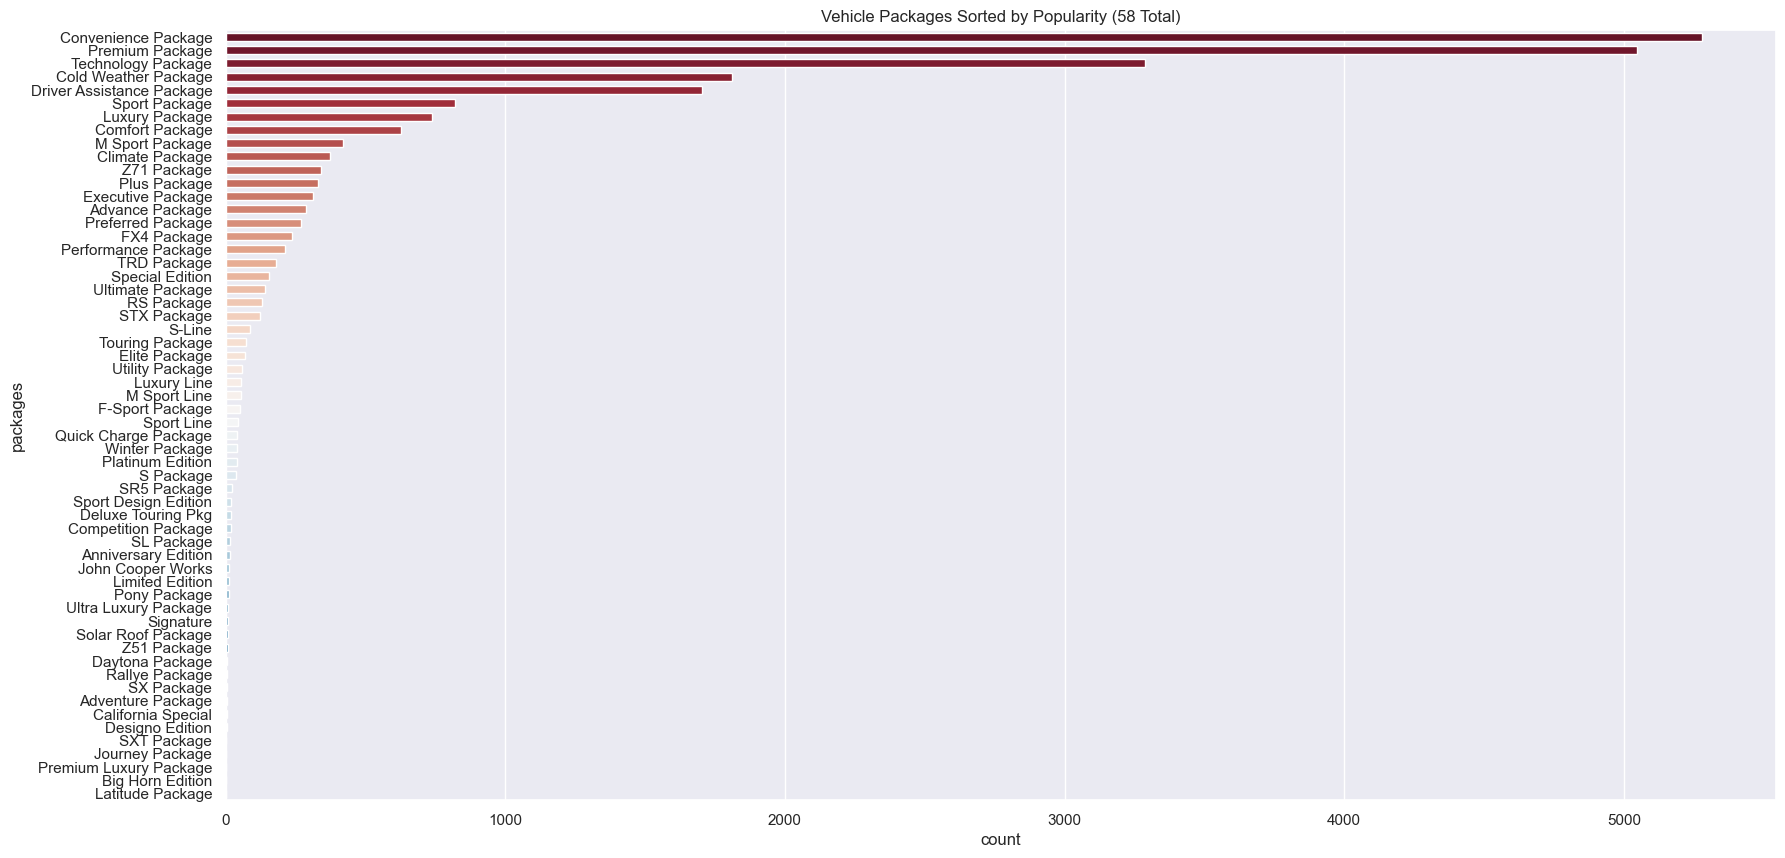

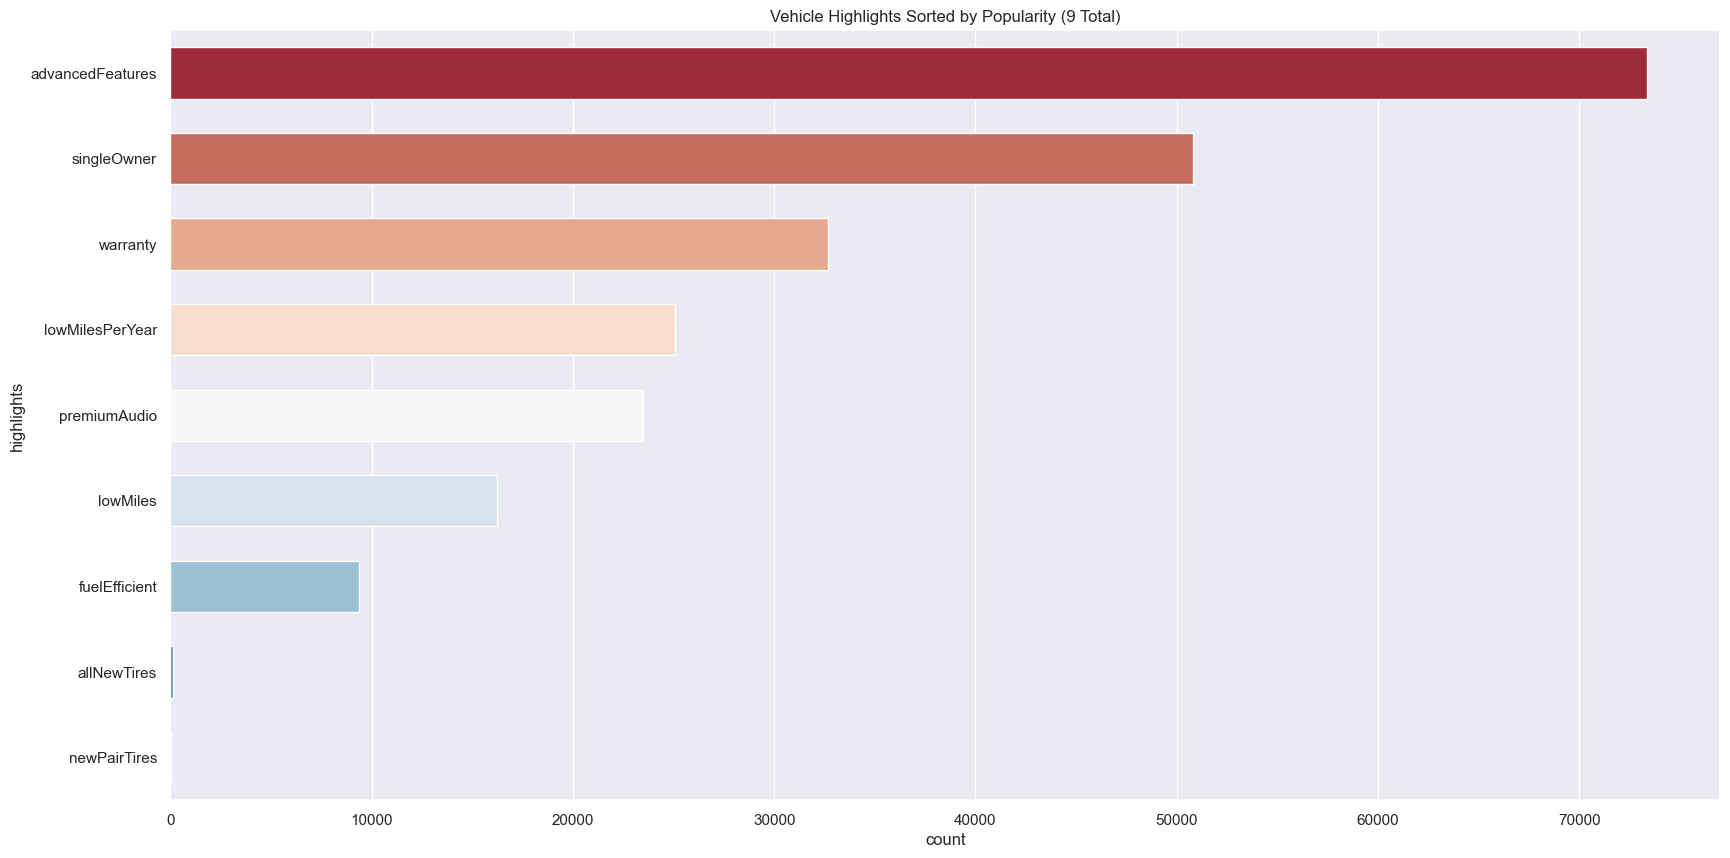

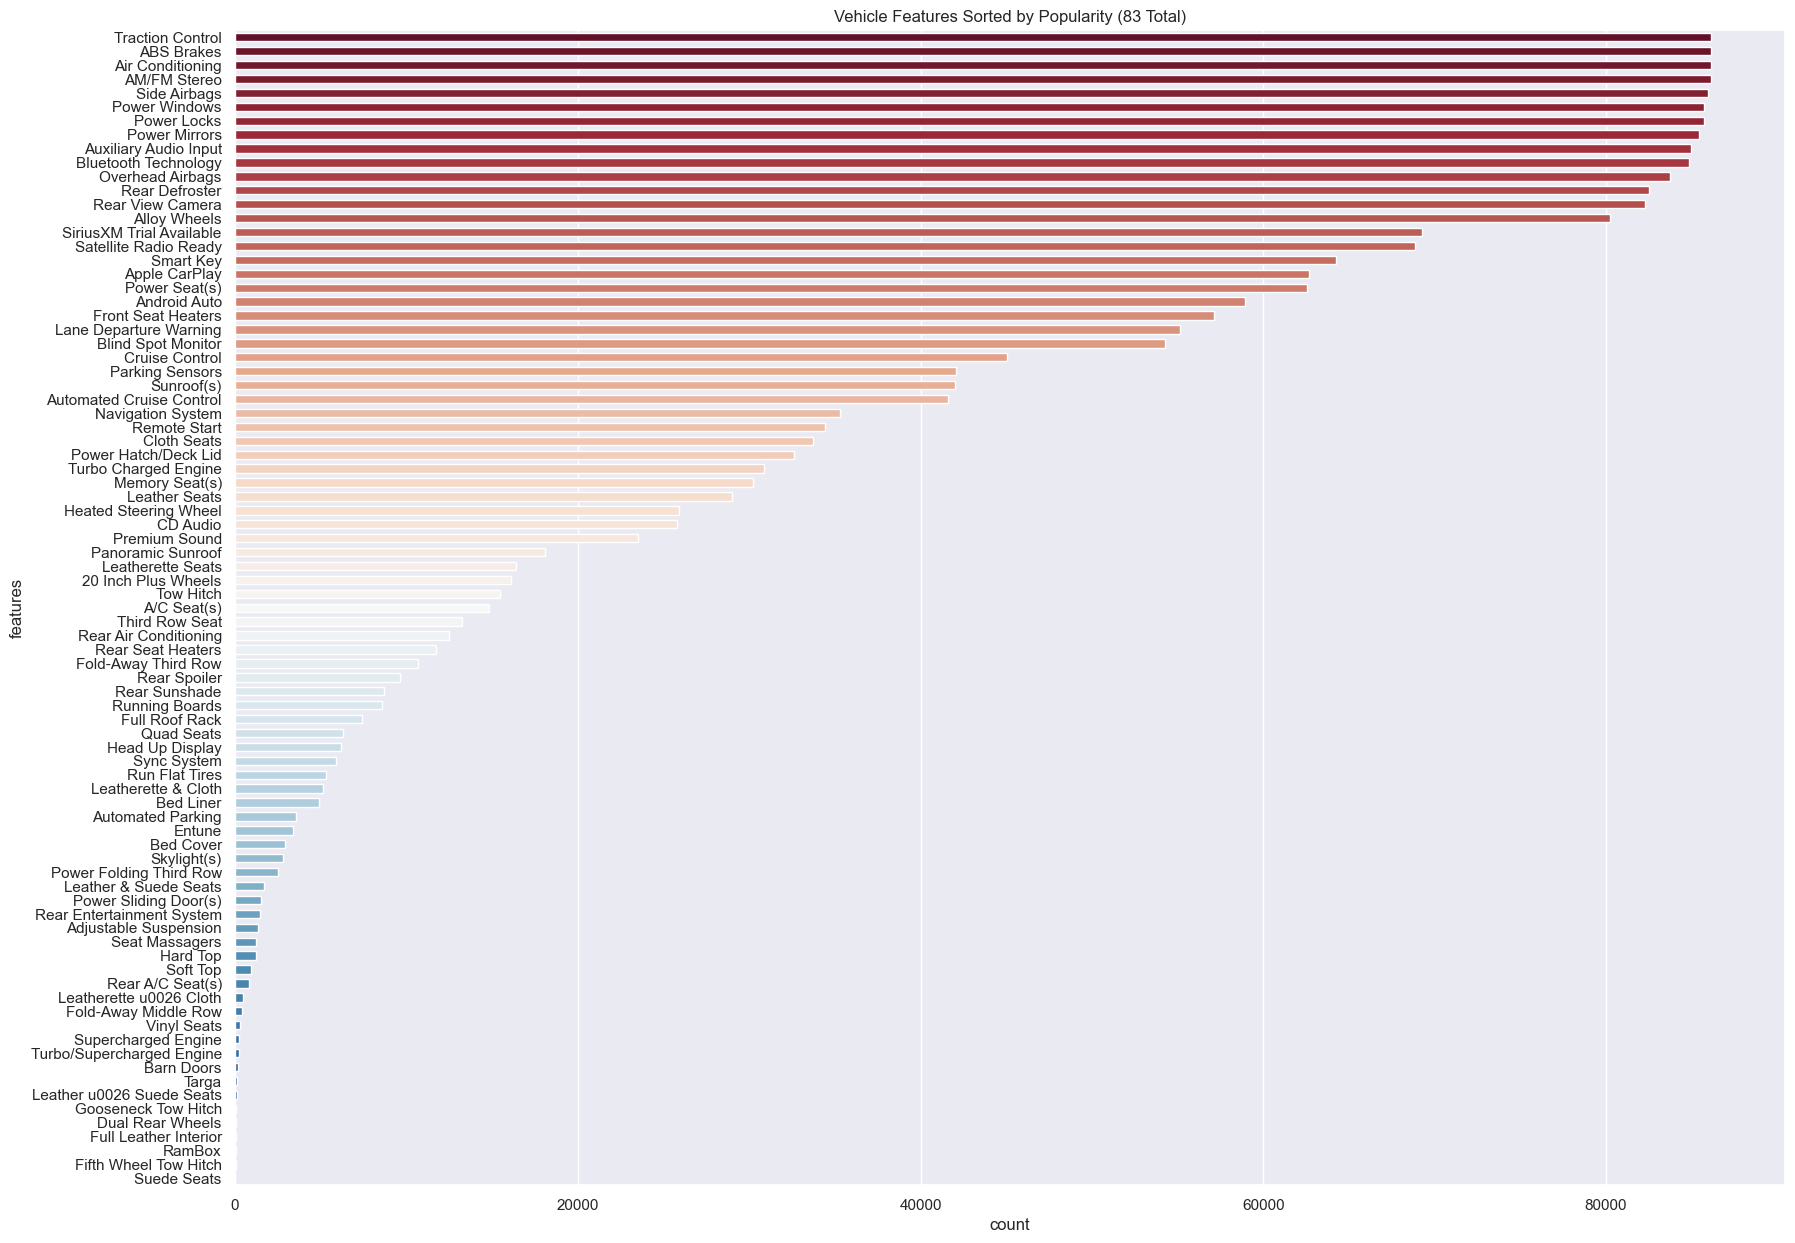

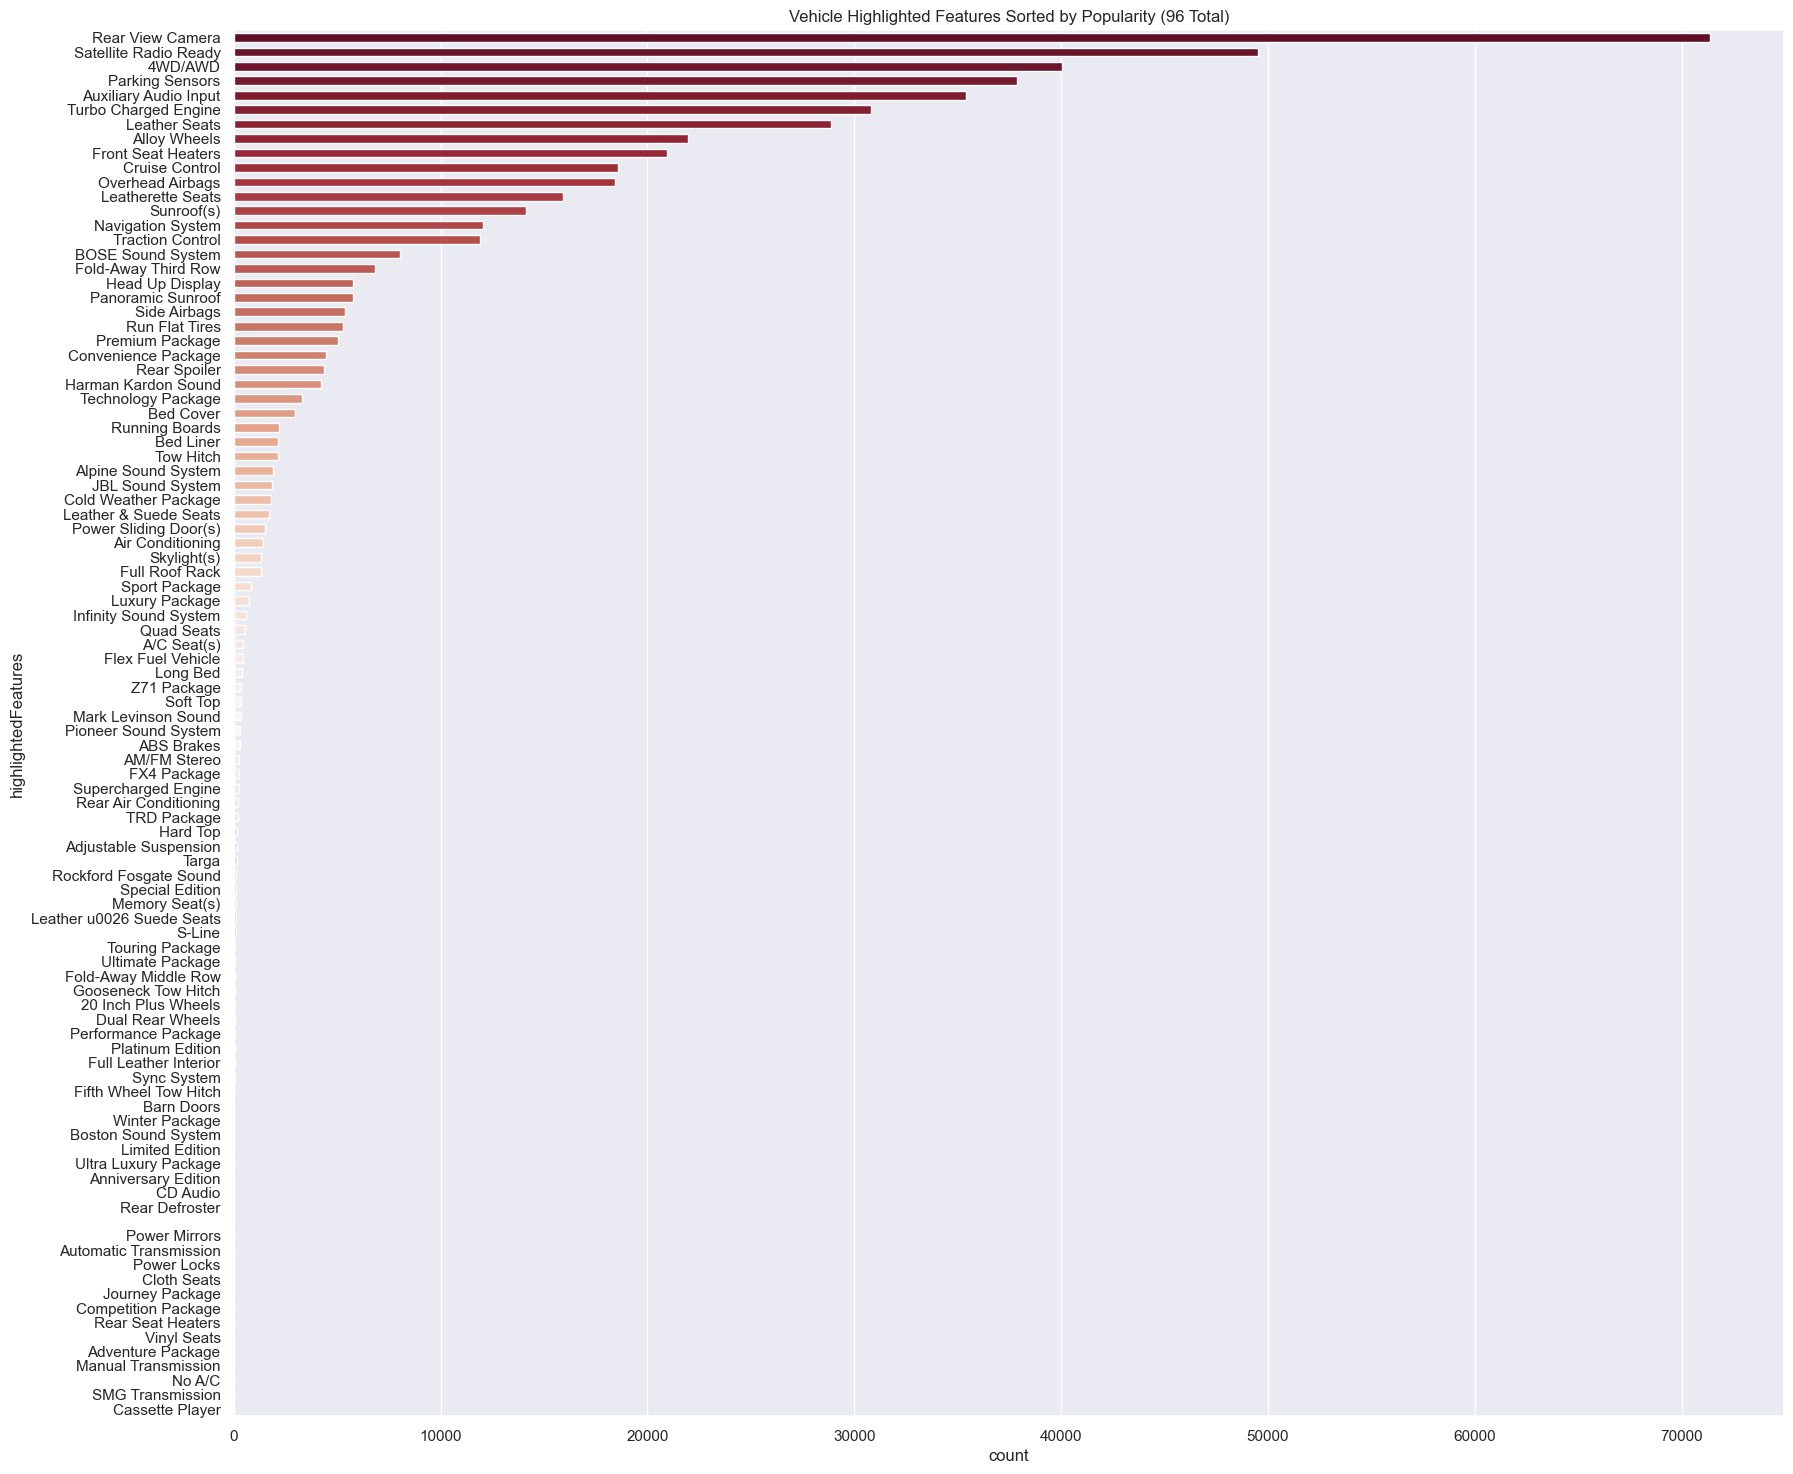

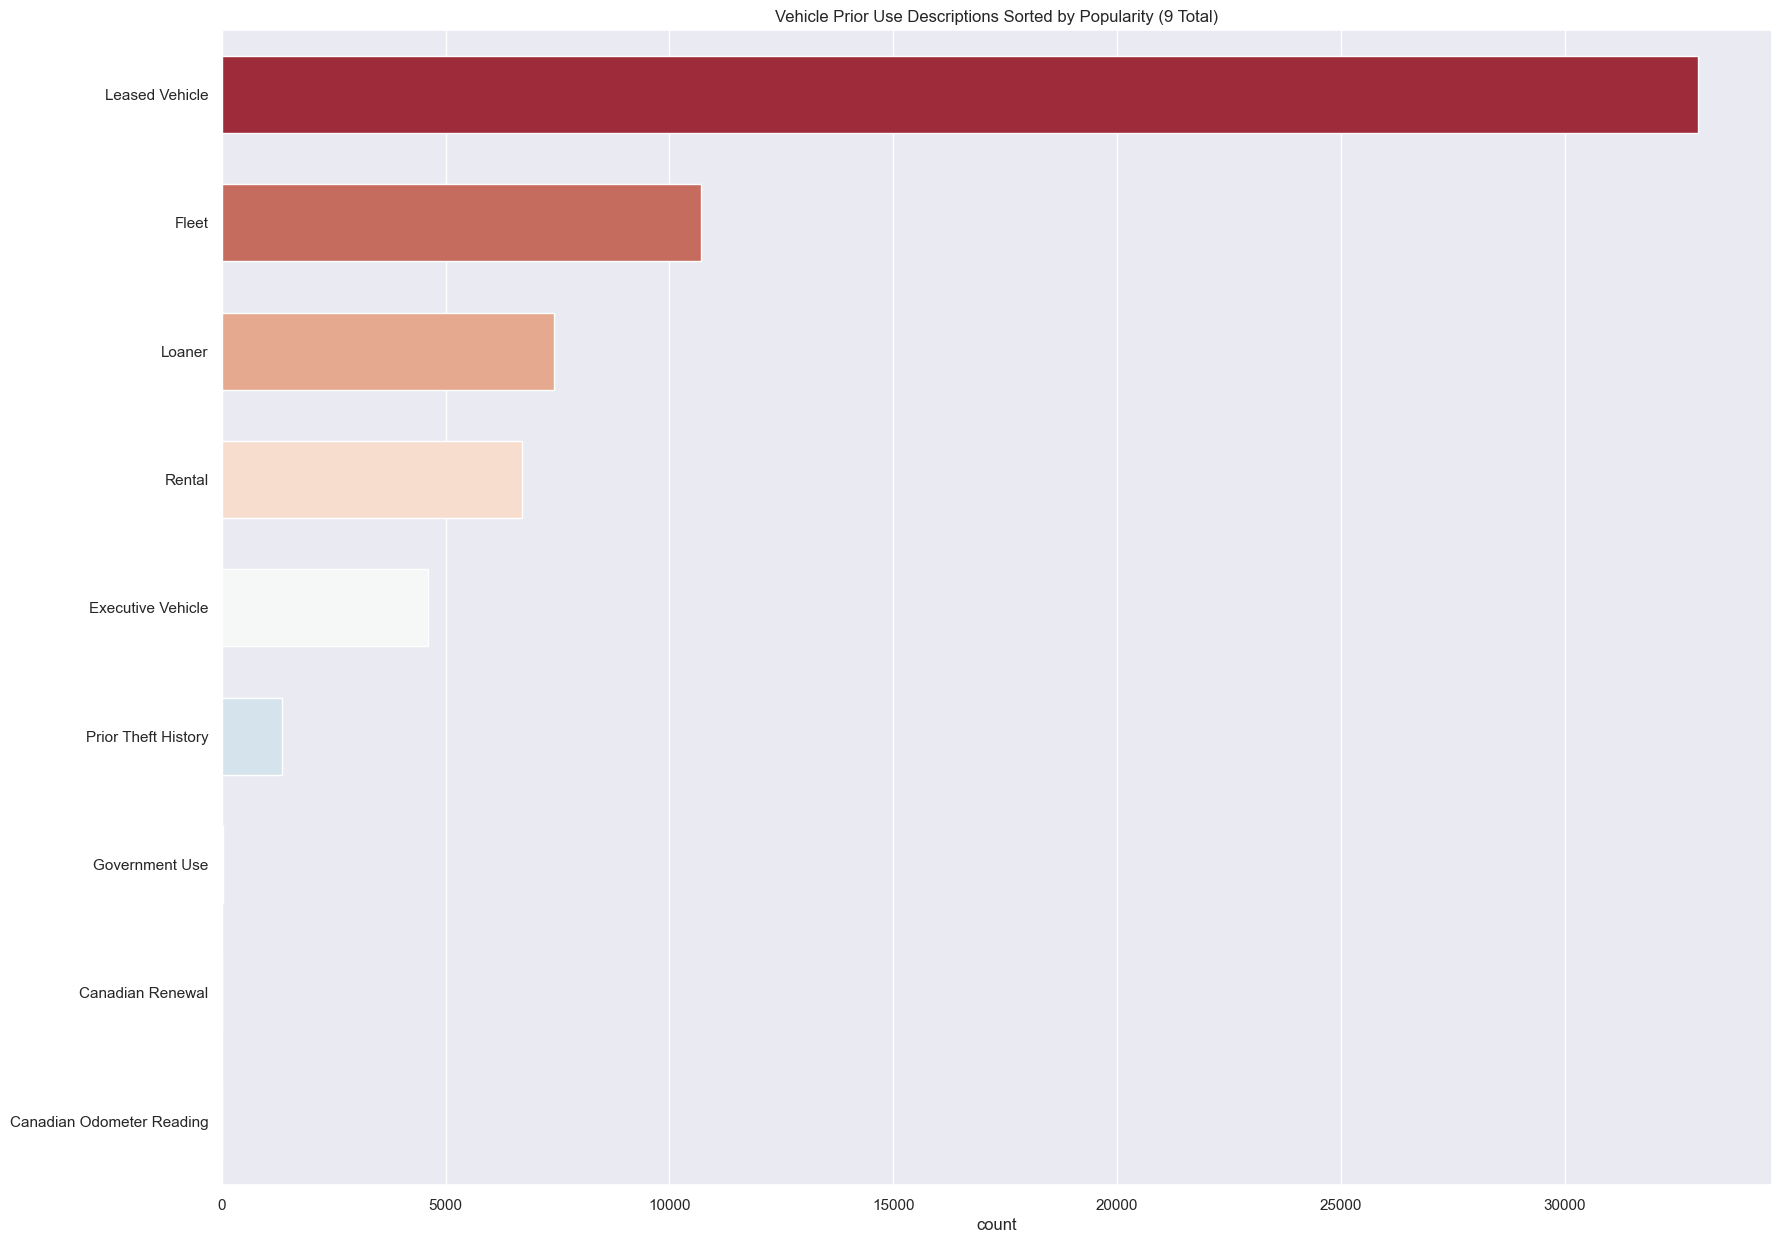

In [5]:
# Plot unique values in packages
packagesDf = vehicle_options_df['packages']
packages_exploded = packagesDf.explode('packages')
plt.figure(figsize = (20, 10))
sns.countplot(y=packages_exploded, order=packages_exploded.value_counts().index, width=0.6, 
              hue_order=packages_exploded, palette="RdBu", legend=False)
plt.title(f'Vehicle Packages Sorted by Popularity ({len(packages_exploded.value_counts())} Total)')

# Plot unique values in highlights
highlightsDf = vehicle_options_df['highlights']
highlights_exploded = highlightsDf.explode('highlights')
plt.figure(figsize = (20, 10))
sns.countplot(y=highlights_exploded, order=highlights_exploded.value_counts().index, width=0.6, 
              hue_order=highlights_exploded, palette="RdBu", legend=False)
plt.title(f'Vehicle Highlights Sorted by Popularity ({len(highlights_exploded.value_counts())} Total)')

# Plot unique values in features
featuresDf = vehicle_options_df['features']
features_exploded = featuresDf.explode('features')
plt.figure(figsize = (20, 15))
sns.countplot(y=features_exploded, order=features_exploded.value_counts().index, width=0.6, 
              hue_order=features_exploded, palette="RdBu", legend=False)
plt.title(f'Vehicle Features Sorted by Popularity ({len(features_exploded.value_counts())} Total)')

# Plot unique values in highlightedFeatures
# Need to convert string to array prior to plotting
hfDf = vehicle_options_df['highlightedFeatures']
hfDfArr = hfDf.str.split(',')
hfDf_exploded = hfDfArr.explode('highlightedFeatures')
plt.figure(figsize = (20, 18))
sns.countplot(y=hfDf_exploded, order=hfDf_exploded.value_counts().index, width=0.6, 
              hue_order=hfDf_exploded, palette="RdBu", legend=False)
plt.title(f'Vehicle Highlighted Features Sorted by Popularity ({len(hfDf_exploded.value_counts())} Total)')

# Plot unique values in priorUseDescriptions
# Extract 'name' values in priorUseDescriptions first
all_names = []
for obj_arr in vehicle_options_df['priorUseDescriptions']:
    for obj in obj_arr:
        all_names.append(obj['name'])
plt.figure(figsize = (20, 15))
sns.countplot(y=all_names, order=pd.Series(all_names).value_counts().index, width=0.6, 
              hue_order=all_names, palette="RdBu", legend=False)
plt.title(f'Vehicle Prior Use Descriptions Sorted by Popularity ({len(pd.Series(all_names).value_counts())} Total)')

Based on the 5 plots of the features above we can make the following observations:

Packages:
- This feature has 58 possible values with Convenience Package, Premium Package, and Technology Package being the 3 most popular
- Some categories may represent the same thing. An example of this is the Cold Weather Package (4th from the top) and the Winter Package (in the middle) have different names but may both have Heated Front Seats and Heated Mirrors. they may be named differently because they belong to different vehicle makes

Highlights:
- This feature has 9 total options available
- It seems to represent historical information about the vehicle, such as the amount of owners its had, whether its under warranty, etc

Features:
- This feature has 83 total options
- The 3 most popular options are Traction Control, ABS Brakes, and Air Conditioning
- This seems to list basic options available in most cars on the market today. For instance the 5th option from the top is Power Windows, unless the car was manufacutred in the early 90s it is unlikely that it has Roll-Down windows. 
- Its possible some of these features don't hold significant predictive power towards the cars price, however, things like the Heated Steering Wheel are listed as well, which should influence a cars price
- Some of these options may only be specific to a particular type of car, like Power Sliding Doors, which are typically only seen on minivans

Vehicle Highlighted Features:
- This feature contains 96 total options, the most out of all of the countplots being examined.
- It is interesting to note that highlighted Features tend to have more options than the general features column
- There is also a Winter Package listed here, which was previously shown in the Packages Countplot above it, suggesting these features contain the same vehicle options in some cases
- There are features like Harmon Kardon Sound, Rockford Fosgate Sound, Boston Sound System, etc. These can probably all be grouped into a single option called Premium Audio. In fact, the Features countplot above it contains a column called Premium Sound.

Vehicle Prior Use Descriptions:
- This feature contains 9 total options.
- These seem to have similar historical information like the Highlights plot, such as prior theft history and whether or not it was a Fleet, Loaner, Rental, or Leased Vehicle
- Some vehicles in the dataset dont have any information in this column and instead contain an empty array

General Observations:
- A lot of these options may be very important to the predictive model, while some may be too specific. Including the very specific features may make the predictive models too complex for this stage of the analysis
- Some of these features can be generalized into one option like the Premium Sound Systems discussed
- One Hot Encoding these categorical values may prove beneficial to the model for the most popular options
- These options in each of these categories also probably play a role in determining the featureScore feature with missing values. This can be a separate machine learning project on its own, using these options to accurately impute the featureScore column can be crucial to reducing complexity in the predictive models.
- It probably makes sense to keep the Prior USe Description Options and Highlights (18 total options) and one hot encode them and leave the rest for a different time.